In [1]:
from IPython.display import Audio
from helpers.plot import compare_audios
from helpers.path_utils import get_base_dir
from helpers.transform import StudentAuscultationManikin

AUDIO_NAME = "SAM-Normal Heart Sounds 90 BPM.wav"
mobile_dir = get_base_dir().joinpath("data", "mobile", "SAM", AUDIO_NAME)
stethos_dir = get_base_dir().joinpath("data", "stethos", "SAM", AUDIO_NAME)

SNIPPET_SECS = 3
DOWNSAMPLE_FACTOR = 100
PEAKS_HEIGHT = 0.7
PEAKS_PROMINENCE = 0.0001

In [2]:
sam = StudentAuscultationManikin()

mobile, stethos, sample_rate = sam.match_heartbeats(
    mobile_dir,
    stethos_dir,
    snippet_secs=SNIPPET_SECS,
    downsample_factor=DOWNSAMPLE_FACTOR,
    peaks_height=PEAKS_HEIGHT,
    peaks_prominence=PEAKS_PROMINENCE,
)

mobile.shape, stethos.shape

(torch.Size([1, 482500]), torch.Size([1, 474700]))

In [3]:
SNIPPET_SECS = 3
cut_on = SNIPPET_SECS * sample_rate

mobile_snippet = mobile[:, :cut_on].clone()
stethos_snippet = stethos[:, :cut_on].clone()

mobile.shape, mobile_snippet.shape

(torch.Size([1, 482500]), torch.Size([1, 12000]))

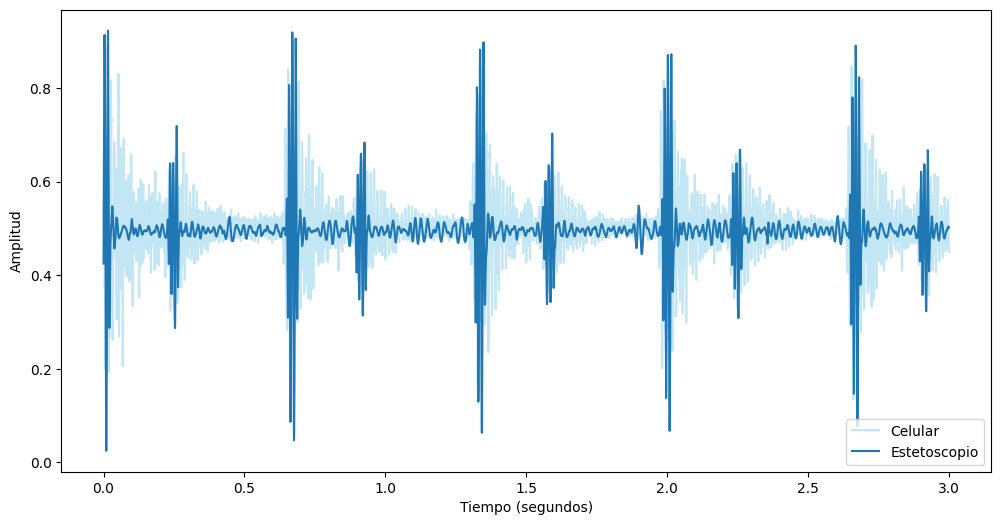

In [4]:
compare_audios(stethos_snippet.squeeze(), mobile_snippet.squeeze(), sample_rate)